# Readme
This is a exercise from the "Hands on Machine Learning Book". 
https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb


In [2]:
import pandas as pd
import tarfile
from pathlib import Path
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import time
start = time.time()

In [3]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [4]:
housing = load_housing_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Check categorical column 
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
# numerical characteristics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


[]

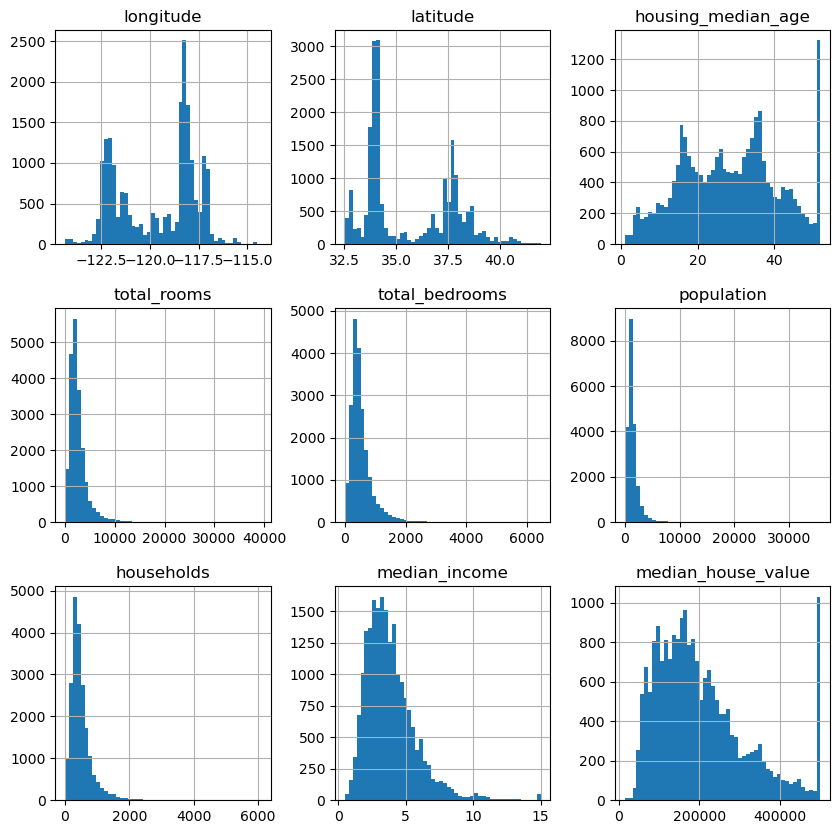

In [9]:
housing.hist(bins=50, figsize=(10, 10))
plt.plot()

In [10]:
# there als self written function but will use just the lib
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

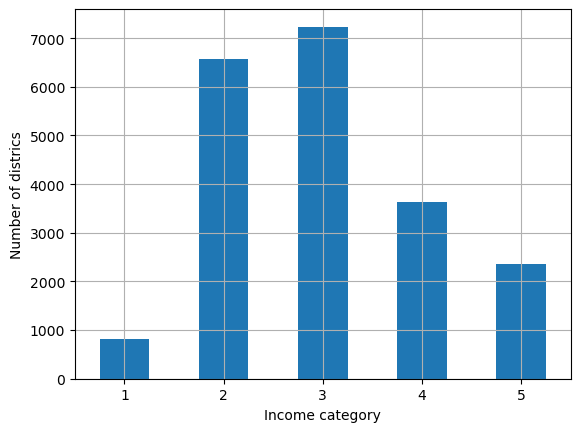

In [11]:
# categorical value for the income mit 5 categories
housing["income_cat"] = pd.cut(housing["median_income"], bins = [0., 1.5 , 3.0 , 4.5 , 6. , np.inf], labels=[1,2,3,4,5])

# Plot
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districs")
plt.show()

In [12]:
# Use more testsets to get better quality result at the model , that was the complicated way to do it
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2 , random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
	strat_train_set_n = housing.iloc[train_index]
	strat_test_set_n = housing.iloc[test_index]
	strat_splits.append([strat_train_set_n, strat_test_set_n])

In [13]:
# easy way
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"],random_state=42)

In [14]:
# check if we are right
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [15]:
strat_test_set["income_cat"]

3905     5
16821    4
2900     3
7193     3
13928    3
        ..
12369    2
8707     2
16634    4
9779     4
3455     3
Name: income_cat, Length: 4128, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [16]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

In [17]:
# Copy Test set
housing = strat_test_set.copy()

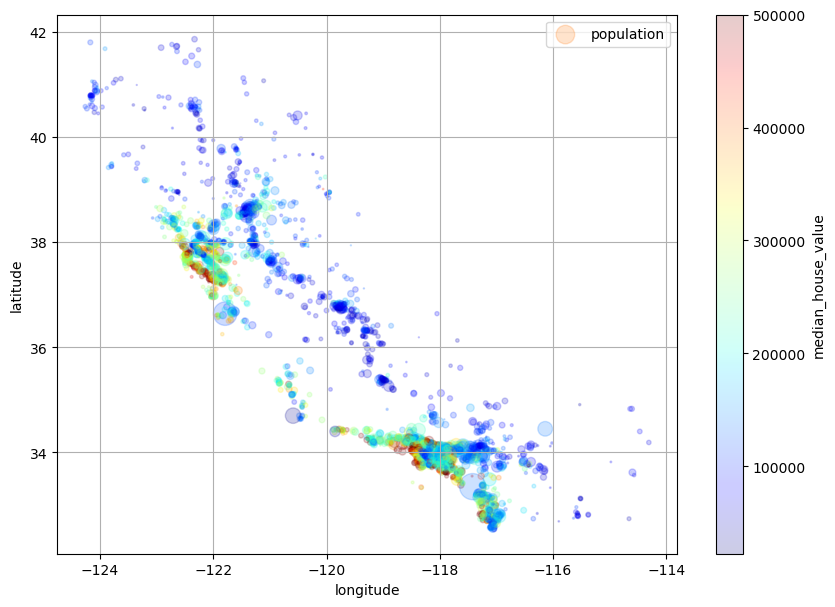

In [18]:
# plot geographical coordinates
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/100, label="population", c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7) ,alpha = 0.2)
plt.show()

In [19]:
# correlation matirx
housing_copy = housing.copy()
housing_copy = housing_copy.drop(columns=["ocean_proximity"])
matrix_corr = housing_copy.corr()
print(matrix_corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.926451           -0.129291     0.044672   
latitude            -0.926451  1.000000            0.033241    -0.033579   
housing_median_age  -0.129291  0.033241            1.000000    -0.359397   
total_rooms          0.044672 -0.033579           -0.359397     1.000000   
total_bedrooms       0.075452 -0.069575           -0.330599     0.931803   
population           0.085312 -0.086085           -0.279408     0.841764   
households           0.059555 -0.068837           -0.314330     0.927997   
median_income       -0.009866 -0.086326           -0.087699     0.199430   
median_house_value  -0.026768 -0.162087            0.118976     0.121070   

                    total_bedrooms  population  households  median_income  \
longitude                 0.075452    0.085312    0.059555      -0.009866   
latitude                 -0.069575   -0.086085   -0.068837      -0.086326   
housing_

In [20]:
# just pay attetion to the median_house_value!
matrix_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687091
total_rooms           0.121070
housing_median_age    0.118976
households            0.043549
total_bedrooms        0.029600
longitude            -0.026768
population           -0.040286
latitude             -0.162087
Name: median_house_value, dtype: float64

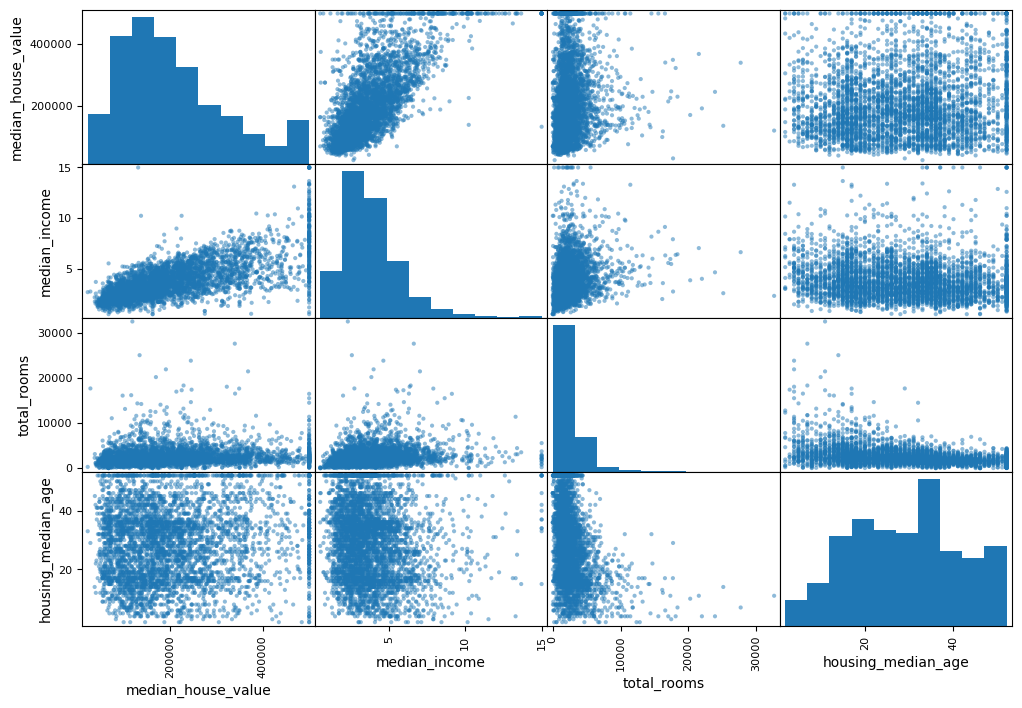

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

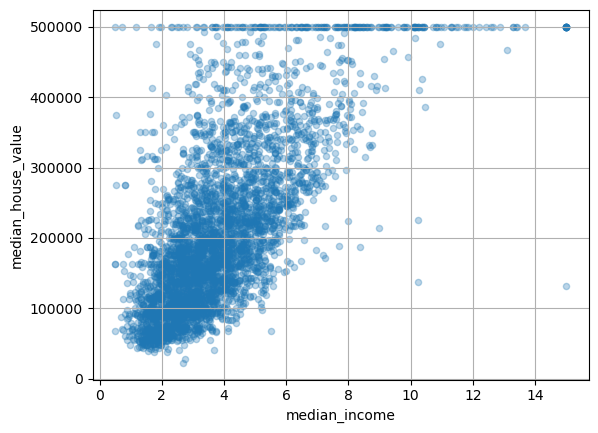

In [22]:
# look closer to the horizontal lines ,correlation is happening
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3, grid=True)
plt.show()

In [23]:
# create new values
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ration"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [24]:
housing_copy = housing.copy()
housing_copy = housing_copy.drop(columns = ["ocean_proximity"])

corr_matrix = housing_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687091
rooms_per_house       0.198322
total_rooms           0.121070
housing_median_age    0.118976
households            0.043549
total_bedrooms        0.029600
people_per_house     -0.025974
longitude            -0.026768
population           -0.040286
latitude             -0.162087
bedrooms_ration      -0.254506
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [25]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

In the book there are 3 options:
```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```
To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [26]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [27]:
# only for numerical values!
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
# Remove the text attribute because medain can only be calculated on numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)
# housing_num = housing.select_dtypes(include=[np.number]) alternatively, Maybe old?
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [28]:
# use imputer for all data
imputer.statistics_
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [29]:
# Transform the Training set:  imputer is trained,  now we can transform the whole train set, and there are no missing values anymore , replace with median values
X = imputer.transform(housing_num)

In [30]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns, index=housing_num.index)

# Handling Text and Categorical Attributes
preprocess the categorical input feature, ocean_proximity

In [31]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [32]:
#convert categorical text column to numeric
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [33]:
#List of the characters
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [34]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [35]:
#convert back to numpy array
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [36]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

/home/daniel/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [37]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [38]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [39]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [40]:
df_test_unknown = pd.DataFrame({"ocean_proximity":["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [41]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [42]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [43]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [44]:
df_test_unknown.index

RangeIndex(start=0, stop=2, step=1)

In [45]:
df_test_unknown

,ocean_proximity
0,<2H OCEAN
1,ISLAND


In [46]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown), columns=cat_encoder.get_feature_names_out(), index=df_test_unknown.index)

# Scale and Transform attributes
Page 105, not taking care of in the example notebook from Gèron 

In [47]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [48]:
from sklearn.preprocessing import StandardScaler
std_scla = StandardScaler()
housing_num_std_scaled = std_scla.fit_transform(housing_num)

In [49]:
# 35 = house age, gamma is how fast the correlation metric decreases 
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [50]:
# Easy LinearRegression Model with one Parameter 
# Works great but there is a better way to do it
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5] # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [51]:
# Use TransformedTargetRegressor
# This approach is much easier
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

# Custom Transformer
New Topic!

In [52]:
# logarithmic for heavy right side
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

Transformer to add extra attributes

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [54]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


Note that I hard coded the indices (3, 4, 5, 6) for concision and clarity in the book, but it would be much cleaner to get them dynamically, like this:

In [55]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

Also, housing_extra_attribs is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a DataFrame, you could run this:

In [56]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
13096,-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,3.211799,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5.504202,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.433,INLAND,5.334975,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,5.351282,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3.725256,1.631399


to do: add ClusterSimilarity(), KMeans 

# Pipeline to transformer

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [58]:
housing_num_tr

array([[-1.42303652,  1.0136059 ,  1.86111875, ..., -0.86602737,
        -0.33020372,  1.84662439],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.0245495 ,
        -0.25361631, -0.5081207 ],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.04119332,
        -0.05104091, -0.20215476],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ..., -0.10998748,
         0.15854151, -0.24249175],
       [ 0.58639727, -0.73960483,  0.66925745, ..., -0.36093745,
        -0.21033248,  0.25977479],
       [-1.41803793,  0.94797769,  1.22545939, ..., -1.32397227,
         0.04958379,  3.61270996]])

In [59]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [60]:
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In [61]:
housing_prepared.shape # book has 24, because of cluster similarity

(16512, 16)

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [63]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [64]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [65]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

/home/daniel/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

# Select and Train a Model

In [66]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [67]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [276608.27419651 333603.0303772  118237.5726011  108255.75159886
 308943.82732346]


In [68]:
#Compare against the actual values:
print("Labels:", list(some_labels))

Labels: [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]


In [69]:
some_data_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875,  0.31191221,  1.36816703,
         0.13746004,  1.39481249, -0.93649149, -0.86602737, -0.33020372,
         1.84662439,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, -0.30861991, -0.43592476,
        -0.69377062, -0.37348471,  1.17194198,  0.0245495 , -0.25361631,
        -0.5081207 ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, -0.71224036, -0.76070869,
        -0.78876841, -0.77572662, -0.75978881, -0.04119332, -0.05104091,
        -0.20215476,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.23121557, -0.88492444, -0.91989094,  0.70226169,  0.74230601,
         0.38317548,  0.73137454, -0.85028088, -0.03485833, -0.14147547,
        -0.14900562,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.71136206, -0.87554898,  0

In [70]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67769.12117461127

In [71]:
#Note: since Scikit-Learn 0.22, you can get the RMSE directly by calling the mean_squared_error() function with squared=False.
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49190.60052737819

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [73]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Better eval with Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([68179.7164381 , 67258.55627212, 66747.10876197, 72757.66827765,
       69428.86115501, 69925.32535691, 72349.29057653, 73190.09810575,
       70307.13891453, 70553.57614878])

In [75]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [68179.7164381  67258.55627212 66747.10876197 72757.66827765
 69428.86115501 69925.32535691 72349.29057653 73190.09810575
 70307.13891453 70553.57614878]
Mean: 70069.73400073592
Standard deviation: 2130.605601030783


In [76]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [69717.57852026 66650.26617871 66488.43193213 70478.22519838
 66837.93229332 68220.31091521 66922.70445332 69700.47781664
 67122.26131607 67802.47918508]
Mean: 67994.06678091262
Standard deviation: 1394.9377015503208


In [77]:
#Note: we specify n_estimators=100 to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [78]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18500.845182815105

In [79]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [48762.28825918 49969.19049146 47573.54522961 50546.87486609
 48864.10555209 49823.40502798 50329.34328877 51257.57472672
 49940.74542084 49433.48950508]
Mean: 49650.05623678271
Standard deviation: 991.5077659326503


In [80]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     67994.066781
std       1470.393444
min      66488.431932
25%      66859.125333
50%      67462.370251
75%      69330.436091
max      70478.225198
dtype: float64

In [81]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110578.44384464291

# Fine-Tune your Model - Gridsearch

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [83]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [84]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [85]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64786.429109613535 {'max_features': 2, 'n_estimators': 3}
55008.34047709832 {'max_features': 2, 'n_estimators': 10}
52544.90894239278 {'max_features': 2, 'n_estimators': 30}
59558.696221842 {'max_features': 4, 'n_estimators': 3}
52220.41086094711 {'max_features': 4, 'n_estimators': 10}
49760.96196931739 {'max_features': 4, 'n_estimators': 30}
57745.70282885063 {'max_features': 6, 'n_estimators': 3}
51281.41637335224 {'max_features': 6, 'n_estimators': 10}
49489.665429000735 {'max_features': 6, 'n_estimators': 30}
58586.09715593945 {'max_features': 8, 'n_estimators': 3}
51693.362593655154 {'max_features': 8, 'n_estimators': 10}
49622.44445561202 {'max_features': 8, 'n_estimators': 30}
62173.15215653825 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53982.55112569407 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59736.219867952765 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52944.7419651652 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [86]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.058785,0.003945,0.002916,0.000214,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.049876e+09,-4.104478e+09,...,-4.197281e+09,1.999464e+08,18,-1.139465e+09,-1.130822e+09,-1.118837e+09,-1.106778e+09,-1.184757e+09,-1.136132e+09,2.670022e+07
1,0.178327,0.009473,0.007426,0.000325,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.077930e+09,-2.915568e+09,...,-3.025918e+09,1.049204e+08,11,-5.839853e+08,-5.794755e+08,-5.782444e+08,-5.728747e+08,-5.756675e+08,-5.780495e+08,3.735178e+06
2,0.540939,0.008809,0.020815,0.000387,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.776422e+09,-2.635723e+09,...,-2.760967e+09,9.576894e+07,8,-4.340413e+08,-4.287927e+08,-4.300791e+08,-4.276770e+08,-4.273686e+08,-4.295917e+08,2.420062e+06
3,0.091394,0.000721,0.002566,0.000030,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.380935e+09,-3.492929e+09,...,-3.547238e+09,1.059030e+08,15,-9.479162e+08,-9.495547e+08,-9.354077e+08,-9.745655e+08,-9.846421e+08,-9.584172e+08,1.825797e+07
4,0.293766,0.004997,0.007044,0.000093,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.678020e+09,-2.622586e+09,...,-2.726971e+09,7.906394e+07,7,-4.994479e+08,-5.173235e+08,-5.095762e+08,-5.111684e+08,-5.062775e+08,-5.087587e+08,5.876702e+06
5,0.901300,0.013871,0.020911,0.000892,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.450701e+09,-2.393976e+09,...,-2.476153e+09,5.451763e+07,3,-3.841492e+08,-3.845209e+08,-3.920878e+08,-3.831359e+08,-3.852893e+08,-3.858366e+08,3.201547e+06
6,0.124909,0.001210,0.002925,0.000221,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.365047e+09,-3.038875e+09,...,-3.334566e+09,2.321637e+08,13,-8.640372e+08,-7.940234e+08,-8.860356e+08,-8.709828e+08,-8.303819e+08,-8.490922e+08,3.301520e+07
7,0.409616,0.011074,0.007170,0.000139,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.714014e+09,-2.362076e+09,...,-2.629784e+09,1.354326e+08,5,-4.971267e+08,-4.657065e+08,-4.839598e+08,-4.813864e+08,-4.873265e+08,-4.831012e+08,1.020609e+07
8,1.232621,0.021346,0.021117,0.002460,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.508980e+09,-2.284928e+09,...,-2.449227e+09,8.319218e+07,1,-3.811516e+08,-3.736656e+08,-3.828253e+08,-3.692066e+08,-3.790399e+08,-3.771778e+08,5.040410e+06
9,0.163475,0.008564,0.002980,0.000137,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.394533e+09,-3.307767e+09,...,-3.432331e+09,7.182851e+07,14,-8.881892e+08,-9.005547e+08,-8.526006e+08,-9.208499e+08,-8.963201e+08,-8.917029e+08,2.231839e+07


# Randomized Search

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb868f5c550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb869882f90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [88]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48817.07237111398 {'max_features': 7, 'n_estimators': 180}
51124.368841786425 {'max_features': 5, 'n_estimators': 15}
50295.19999459879 {'max_features': 3, 'n_estimators': 72}
50497.3939287014 {'max_features': 5, 'n_estimators': 21}
48905.78551167292 {'max_features': 7, 'n_estimators': 122}
50282.233508532976 {'max_features': 3, 'n_estimators': 75}
50039.318321106344 {'max_features': 3, 'n_estimators': 88}
49118.457451549664 {'max_features': 5, 'n_estimators': 100}
49892.18228479081 {'max_features': 3, 'n_estimators': 150}
65003.603277711685 {'max_features': 5, 'n_estimators': 2}


# Analyze the Best Models and Their Errors


feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [89]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.12728791e-02, 6.54321372e-02, 4.32129653e-02, 1.81524411e-02,
       1.64740195e-02, 1.75839475e-02, 1.62698618e-02, 3.25874013e-01,
       4.77885564e-02, 1.13429502e-01, 9.52943597e-02, 8.01398025e-03,
       1.54410499e-01, 9.13375828e-05, 2.33100242e-03, 4.36849765e-03])

In [90]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
print(full_pipeline)
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])


[(0.32587401331044474, 'median_income'),
 (0.154410498776203, 'INLAND'),
 (0.11342950246577534, 'pop_per_hhold'),
 (0.0952943597267449, 'bedrooms_per_room'),
 (0.07127287911034556, 'longitude'),
 (0.06543213717751256, 'latitude'),
 (0.04778855639185918, 'rooms_per_hhold'),
 (0.04321296526058239, 'housing_median_age'),
 (0.018152441064856625, 'total_rooms'),
 (0.017583947470274367, 'population'),
 (0.01647401952142944, 'total_bedrooms'),
 (0.01626986183181417, 'households'),
 (0.008013980247479598, '<1H OCEAN'),
 (0.004368497646219832, 'NEAR OCEAN'),
 (0.0023310024156462726, 'NEAR BAY'),
 (9.133758281200087e-05, 'ISLAND')]

# Evaluate Your System on the Test Set

In [91]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [92]:
final_rmse

50522.23283351011

We can compute a 95% confidence interval for the test RMSE:

In [93]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([48193.05629829, 52748.6620266 ])

We could compute the interval manually like this:

In [94]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(48193.0562982949, 52748.66202659735)

Alternatively, we could use a z-scores rather than t-scores:

In [95]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(48193.75589671354, 52748.02284005348)

# Exercise 
## Exercise 1
Try to sue Support Vecotr Machine Regressor, with different hyper parameters.
SVM doesn't work that good with big trainings set. So it is a good idea to use just 5000 instance. Cross Validation with 3 folds (otherwise it takes way too long).

In [96]:
from sklearn.svm import SVR

svr_model = SVR(kernel="linear", C= 1.0)
svr_model.fit(housing_prepared, housing_labels)
housing_predictions = svr_model.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110578.44384464291

In [97]:
svr_model = SVR(kernel="linear", C= 50.0)
svr_model.fit(housing_prepared, housing_labels)
housing_predictions = svr_model.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

73000.00071170848

In [98]:
svr_model = SVR(kernel="rbf", C= 1.0)
svr_model.fit(housing_prepared, housing_labels)
housing_predictions = svr_model.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

118108.43850802029

In [99]:
svr_model = SVR(kernel="rbf", C= 10.0, gamma='auto')
svr_model.fit(housing_prepared, housing_labels)
housing_predictions = svr_model.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

114958.2836587818

In [100]:
scores = cross_val_score(svr_model, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=3)
smv_rmse_scores = np.sqrt(-scores)
smv_rmse_scores

array([117369.42665821, 115282.08971363, 115571.03536934])

In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   6.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.1s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.3s
[CV] END .............................C=100.0, kernel=linear; total time=   6.1s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [113]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

71178.5000725107

In [114]:
grid_search.best_params_

{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   6.3s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   6.4s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   6.2s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   6.3s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   6.1s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   9.6s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   9.5s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   9.7s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   9.5s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=  10.1s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

In [107]:
rnd_search.best_estimator_

SVR(C=1000.0, gamma=0.03)

In [ ]:
end = time.time()
print(end - start)